In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [2]:
# Load dataset
df = pd.read_csv("stock_prices.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Ensure daily frequency
df = df.asfreq('D')

# Fill missing values (if any)
df.ffill(inplace=True)
# Preview
df.head()

,Open,Close,Volume
Date,,,
2023-01-01,102.48,103.20,8266
2023-01-02,99.31,100.43,9702
2023-01-03,103.24,105.41,1384
2023-01-04,107.62,109.73,1404
2023-01-05,98.83,96.07,9175


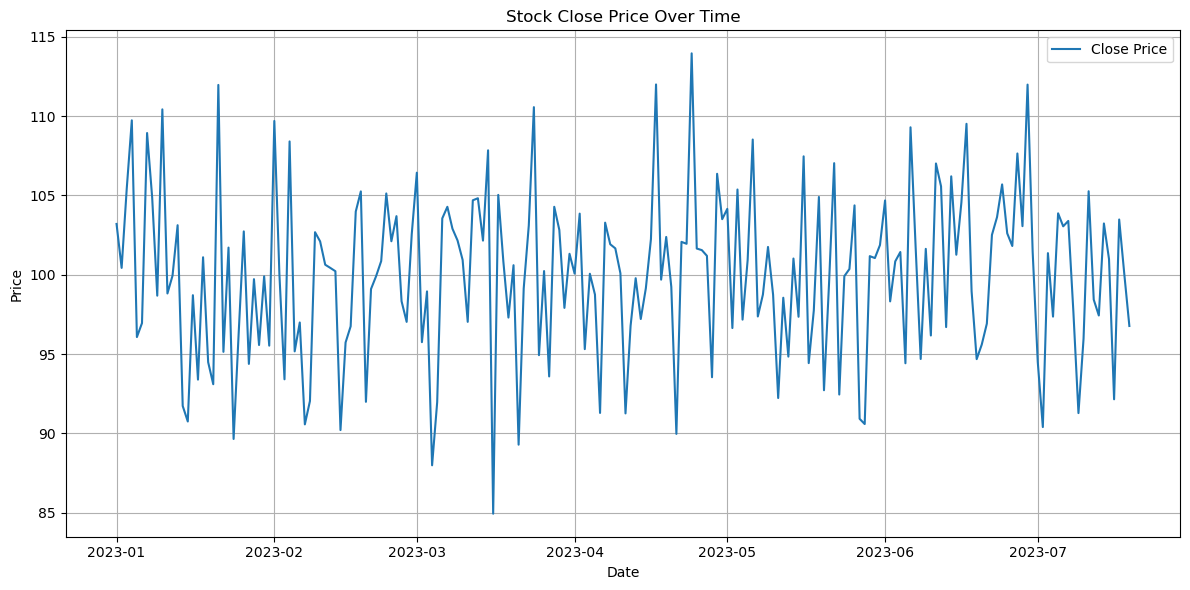

In [3]:
# Plot Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Create lag feature and moving average
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_MA7'] = df['Close'].rolling(window=7).mean()

# Drop rows with NaN values
df.dropna(inplace=True)

# Preview
df[['Close', 'Close_Lag1', 'Close_MA7']].head()

,Close,Close_Lag1,Close_MA7
Date,,,
2023-01-07,108.93,96.95,102.960000
2023-01-08,104.87,108.93,103.198571
2023-01-09,98.68,104.87,102.948571
2023-01-10,110.42,98.68,103.664286
2023-01-11,98.82,110.42,102.105714


In [5]:
# Use Close prices only
close_prices = df['Close']

# Train-test split (90% train, 10% test)
train_size = int(len(close_prices) * 0.9)
train, test = close_prices[:train_size], close_prices[train_size:]


In [6]:
# Initialize ARIMA model (p=5, d=1, q=0 as an example)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future prices
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

In [7]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 7.139279747197401
RMSE: 8.38262415600864


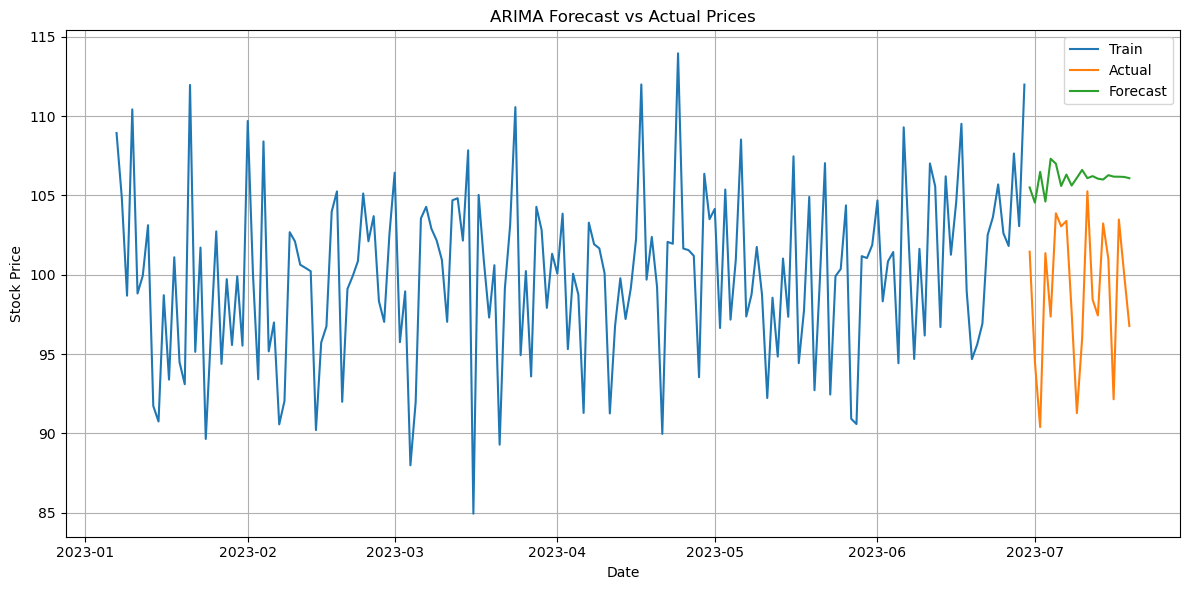

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()